# Dataset 1: Uber Fares Dataset

In [1]:
import pandas as pd 
uber = pd.read_csv('uber.csv')

## Clean the Data (deal with missing values)

In [2]:
uber.isnull().sum()[uber.isnull().sum() > 0]  
# the samples containing missing values are few, just drop them

dropoff_longitude    1
dropoff_latitude     1
dtype: int64

In [5]:
uber = uber.dropna()
uber = uber[uber['pickup_longitude'] != 0]
uber = uber[uber['passenger_count'] < 208]

## Use sklearn.linear_model.LinearRegression

## Use sklearn.metrics.mean_squared_error and at least one other sklearn.metrics option to evaluate model performance 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = uber['pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	passenger_count'.split()]
y = uber['fare_amount']
lr = LinearRegression()
lr.fit(X, y)
print('mse =', mean_squared_error(y, lr.predict(X)))

mse = 96.2510998053135


## Use sklearn.tree.DecisionTreeRegressor

## Use k-fold Cross Validation (cross_val_score)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
cross_val_score(
    DecisionTreeRegressor(),
    X,
    y,
    cv=5
)

array([0.53414575, 0.54214256, 0.63095052, 0.63409218, 0.60093527])

# Dataset 2: Wake County Real Estate Price Prediction

In [83]:
house = pd.read_csv('WakeCountyHousing.csv')
house.head()

,Real_Estate_Id,Deeded_Acreage,Total_Sale_Price,Total_Sale_Date,Month_Year_of_Sale,Year_of_Sale,Year_Built,Year_Remodeled,Heated_Area,Num_Stories,Design_Style,Bath,Utilities,Physical_City,Physical_Zip
0,19,0.21,34500,1/1/1974,January 1974,1974,1964,1964,1828,One Story,Split level,2 Bath,ALL,Raleigh,27610.0
1,20,0.46,35500,5/18/1983,May 1983,1983,1970,1970,1240,One Story,Conventional,1 Bath,E,Raleigh,27610.0
2,22,0.46,37500,9/16/2004,September 2004,2004,1900,1900,2261,One Story,Conventional,2 Bath,WSE,Wendell,27591.0
3,25,0.96,70000,1/1/1971,January 1971,1971,1971,1971,3770,One Story,Conventional,Other,WGE,Raleigh,27613.0
4,30,0.47,380000,8/12/2015,August 2015,2015,1946,2017,1789,One Story,Conventional,2 Bath,ALL,Raleigh,27607.0


## Use an Ordinal Encoder

In [84]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for col in 'Year_of_Sale	Year_Built	Year_Remodeled'.split():
    house[col] = oe.fit_transform(house[col].values.reshape(-1, 1))

## Use a One Hot Encoder

In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
for col in 'Num_Stories	Design_Style	Bath	Utilities	Physical_City'.split():
    house = pd.concat(
        [
            house, 
            pd.DataFrame(
                ohe.fit_transform(house[col].values.reshape(-1, 1)).toarray()
            )
        ], axis=1
    )

## Scale/normalize/standardize features using sklearn.preprocessing

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in 'Deeded_Acreage Heated_Area'.split():
    house[col] = sc.fit_transform(house[col].values.reshape(-1, 1))

## Implement a custom transformer

## Use an Ensamble of Methods

## Use Grid Search CV or RandomizedSearch CV to tune hyperparameters for a model

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

train_X, test_X, train_y, test_y = train_test_split(
    house[
        'Year_of_Sale	Year_Built	Year_Remodeled'.split() + \
        'Deeded_Acreage Heated_Area'.split() + \
        [col for col in house.columns if isinstance(col, int)]   
    ],
    house['Total_Sale_Price'],
    test_size=.2
)


param_grid = {
    'n_estimators': [3, 10], 
    'max_features': [2, 3, 4]
}

gsearch = GridSearchCV(RandomForestRegressor(), 
                        param_grid,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=1,
                        return_train_score=True)
gsearch.fit(train_X, train_y)
model = gsearch.best_estimator_
best_idx = gsearch.best_index_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


## Evaluate your system on the Test Data

In [89]:
print('mse =', mean_squared_error(test_y, model.predict(test_X)))

mse = 7497412406.038846


# Dataset 3: MNIST

In [90]:
import torchvision
train_data = torchvision.datasets.MNIST(
root ='./mnist/',
train =True , # this is training data
)
test_data = torchvision.datasets.MNIST(root ='./mnist/', train = False)
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()

## Use SGDClassifier

## Create a single pipeline that does full process from data preparation to final prediction.

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

pipe_lr = Pipeline([('sc', StandardScaler()),
                    ('clf', SGDClassifier(random_state=1))
                    ])

pipe_lr.fit(X_train.reshape(X_train.shape[0], -1), Y_train)
print('acc =', (pipe_lr.predict(X_test.reshape(X_test.shape[0], -1)) == Y_test).mean())

acc = 0.8997


## Implement a custom transformer

In [95]:
# divided by 255 such that all values are between 0 and 1
X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train /= 255
X_test /= 255

## Use sklearn.neighbors.KNeighborsClassifier 

## Generate a ROC Curve or related

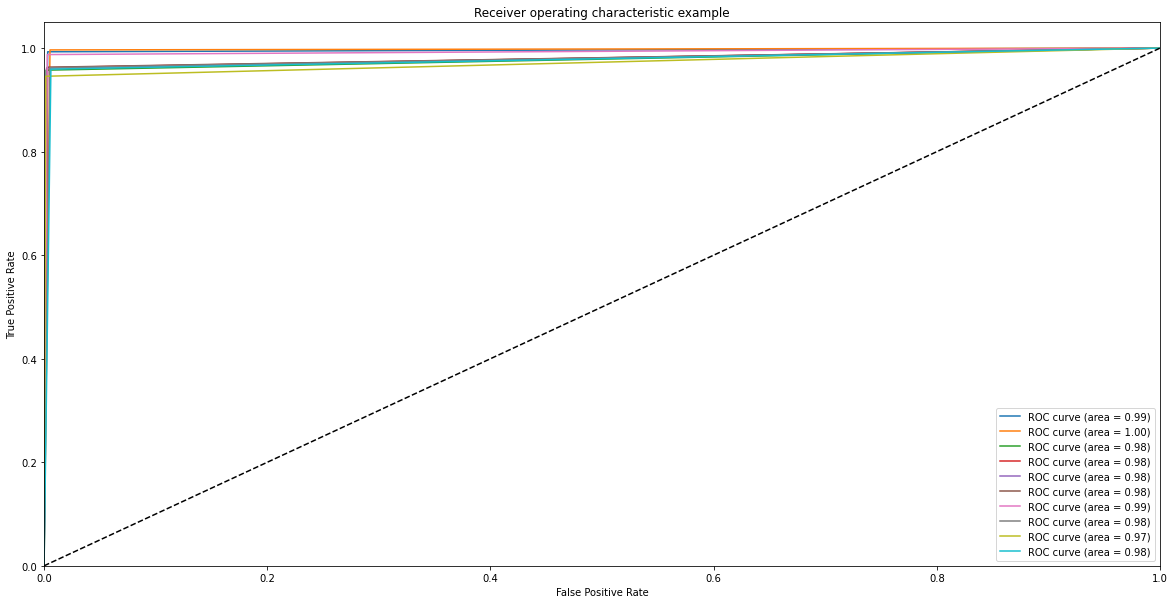

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt 


n_classes = 10
clf = OneVsRestClassifier(KNeighborsClassifier())
y_score = clf.fit(
    X_train.reshape(X_train.shape[0], -1), 
    Y_train
).predict(X_test.reshape(X_test.shape[0], -1))

y_score = pd.get_dummies(y_score).values
Y_test = pd.get_dummies(Y_test).values

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(20, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend()

## Use sklearn.ensamble.RandomForestClassifier

## Generate a confusion matrix

<Figure size 1440x720 with 0 Axes>

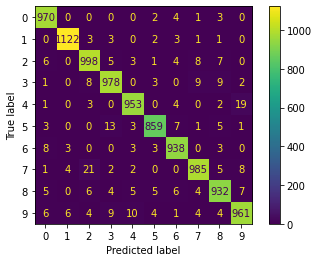

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

rf = RandomForestClassifier()

rf.fit(
    X_train.reshape(X_train.shape[0], -1), 
    Y_train
)

plot_confusion_matrix(
    rf,
    X_test.reshape(X_test.shape[0], -1), 
    Y_test
)

## use OvO or OvR classifier

## Use StratifiedKFold cross validation

In [103]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_reg = LogisticRegression()       
ovr = OneVsOneClassifier(log_reg)
cross_val_score(
    ovr,
    X_train.reshape(X_train.shape[0], -1), 
    Y_train,
    cv=StratifiedKFold()
)

array([0.94133333, 0.93258333, 0.93633333, 0.93275   , 0.94083333])